Create two random data sets with two features and two classes

Dependencies

In [918]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Consider that you are given a car height and you have the class label as 1 if cost of car is greater than 550 and 0 if it is less than or equal to 550.

In [919]:
data = pd.read_csv('Data.csv').to_numpy()

# Create the labels from the data

In [920]:
label = []
x_c1 = []
x_c2 = []
c1_count = 0
c2_count = 0
for i in range(data.shape[0]):
  if(data[i][1] > 550):
    label.append(1)
    x_c1.append(data[i][0])
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(data[i][0])
    c2_count += 1

In [921]:
print(label)
print(x_c1)
print(x_c2)

[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.5, 2.5, 1.5, 1.5, 3.0, 1.5, 1.0, 2.5, 1.0, 1.5, 1.0]
[1.0, 5.0, 3.0, 2.5]


# Plotting the distribution of samples.

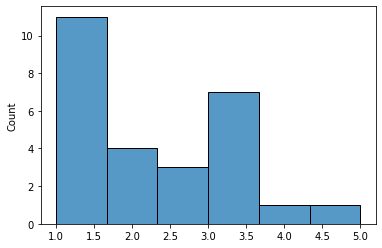

In [922]:
import seaborn as sns
x = data[:,0]
sns.histplot(x)
#Not a preferred way to plot distribution

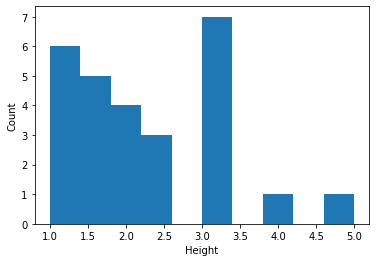

In [923]:
#This gives a clear idea
plt.hist(x)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

# Prior Probabilities for both the classes

In [924]:
no_of_samples = len(data)
prob_c1 = c1_count/no_of_samples
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


# Unique Values

In [925]:
from collections import Counter
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 

Plot the count of each unique element of the feature

In [926]:
unique_c1

dict_keys([3.0, 4.0, 2.0, 1.0, 1.5, 2.5])

In [927]:
count_unique_c1

[6, 1, 4, 5, 5, 2]

In [928]:
unique_c2

dict_keys([1.0, 5.0, 3.0, 2.5])

In [929]:
count_unique_c2

[1, 1, 1, 1]

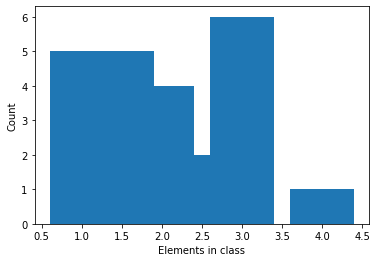

In [930]:
#Not a preferred way to plot distribution
plt.bar(unique_c1,count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

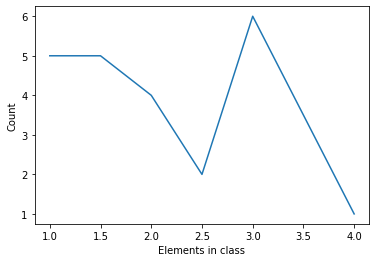

In [931]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

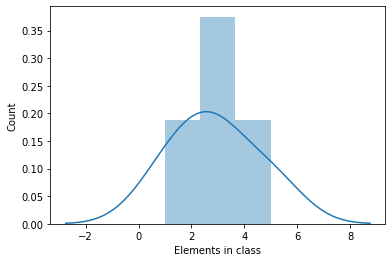

In [932]:
#Probability distribution of x_c2
sns.distplot(x_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

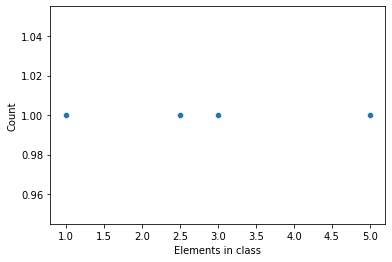

In [933]:
#Plot for the unique values in class c2
sns.scatterplot(list(unique_c2),count_unique_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

# Likelihood

Plot P(x|C1) and P(x|C2)

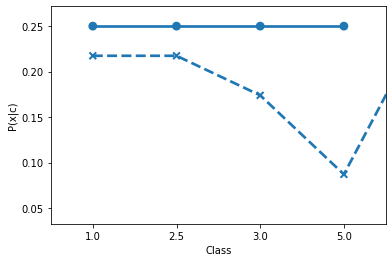

[0.26086957 0.04347826 0.17391304 0.2173913  0.2173913  0.08695652]
[0.25 0.25 0.25 0.25]


In [934]:
#sns.color_palette("Paired", 9)
y1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(x_c2)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.show()
print(y1)
print(y2)
#score = y1.mean()
#score1 = y2.mean()
#score = score + score1

In [935]:
#prior*likelihood
post_c1 = prob_c1 * y1
post_c2 = prob_c2 * y2

print(post_c1)
print(post_c2)

[0.22222222 0.03703704 0.14814815 0.18518519 0.18518519 0.07407407]
[0.03703704 0.03703704 0.03703704 0.03703704]


# Posterior Probability

In [936]:
#EVIDENCE
z = []
for i in range(data.shape[0]):
  z.append(data[i][0])
z.sort()
z1=list(set(z))
z1.sort()
print(z1)

u1 = list(unique_c1)
u2 = list(unique_c2)
for i in z1:
  class_c1=0
  class_c2=0
  if u1.count(i)==1 and u2.count(i)==1:
    class_c1 = y1[u1.index(i)]
    class_c2 = y2[u2.index(i)]
    evi = class_c1+class_c2
    post_c1[u1.index(i)]/=evi
    post_c2[u2.index(i)]/=evi
  else:
    if u1.count(i)==1:
      class_c1 = y1[u1.index(i)]
      post_c1[u1.index(i)]/=class_c1
    else:
      class_c2 = y2[u2.index(i)]
      post_c2[u2.index(i)]/=class_c2
print(post_c1)
print(post_c2)

[1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]
[0.43498818 0.85185185 0.85185185 0.39621016 0.85185185 0.21983274]
[0.07924203 0.14814815 0.07249803 0.10991637]


Plot P(C1|x) and P(C2|x)

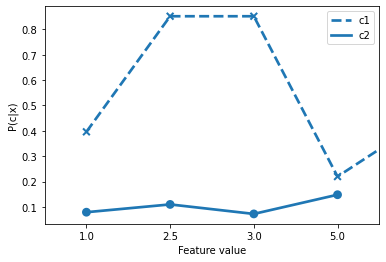

In [937]:
sns.pointplot(list(unique_c1),post_c1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),post_c2,linestyles='-',markers=['o'])
plt.xlabel("Feature value")
plt.ylabel("P(c|x)")
plt.legend(["c1","c2"])
plt.show()

# Dataset 2

Read dataset. c1 contains two features of class 1 and c2 contains the two features for class 2. 

In [938]:
class1_tr = pd.read_csv('c1')
class2_tr = pd.read_csv('c2')
class1_train = class1.to_numpy()
class2_train = class2.to_numpy()

In [939]:
#creating bins using pd.cut
ct3 = pd.DataFrame()
ct3 = pd.concat([class1_tr,class2_tr],axis=0)
ct3 = ct3.reset_index()

#extracting features x1 and x2 of class c1 and c2 separately
class_x1 = pd.cut(ct3["x1"],right=False,bins=8,labels=[1,2,3,4,5,6,7,8])
class_x2 = pd.cut(ct3["x2"],right=False,bins=8,labels=[1,2,3,4,5,6,7,8])
print(class_x1)
print("")
print(class_x2)
class1_train_1 = pd.DataFrame()
class2_train_2 = pd.DataFrame()
class1_train_1["x1"] = class_x1.iloc[:159] #for extracting x1 of c1
class1_train_1["x2"] = class_x2.iloc[:159] #for extracting x2 of c1
class2_train_2["x1"] = class_x1.iloc[160:] #for extracting x1 of c2
class2_train_2["x2"] = class_x2.iloc[160:] #for extracting x2 of c2
print(class1_train_1)
print("")
print(class2_train_2)
#making series of class
ct3['class']=pd.Series()
ct3['class'].iloc[:159]=0 #assigning all x1 as class/label 0
ct3['class'].iloc[160:]=1 #assigning all x2 as class/label 1

#final class1 and class 2 train of separate x1 and x2 of c1 and c2 after making them discretized
class1_train1 = class1_train_1.to_numpy()
class2_train2 = class2_train_2.to_numpy()

0      5
1      4
2      8
3      7
4      6
      ..
194    4
195    3
196    5
197    5
198    4
Name: x1, Length: 199, dtype: category
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

0      5
1      4
2      4
3      7
4      5
      ..
194    3
195    3
196    4
197    4
198    1
Name: x2, Length: 199, dtype: category
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]
    x1 x2
0    5  5
1    4  4
2    8  4
3    7  7
4    6  5
..  .. ..
154  5  5
155  8  7
156  6  4
157  5  5
158  6  5

[159 rows x 2 columns]

    x1 x2
160  4  5
161  3  1
162  4  2
163  3  2
164  3  2
165  5  4
166  5  4
167  3  4
168  3  3
169  2  3
170  5  3
171  4  3
172  2  3
173  4  4
174  3  1
175  3  4
176  4  2
177  4  3
178  2  3
179  5  4
180  3  3
181  4  4
182  4  3
183  1  3
184  3  2
185  3  5
186  5  5
187  2  1
188  1  2
189  4  3
190  3  2
191  4  3
192  2  4
193  1  1
194  4  3
195  3  3
196  5  4
197  5  4
198  4  1


Print the data

In [940]:
print(class1_train.shape)
print(class1_train)
print(type(class2_train))
print(class2_train.shape)
print(type(class1_train))
print(class2_train)

(160, 2)
[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.150590

# Plotting the distribution of samples.

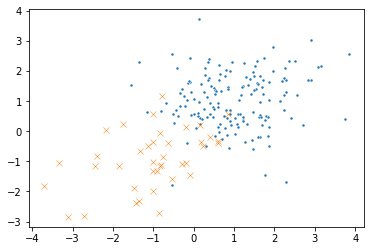

In [941]:
import seaborn as sns
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='.')
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='x')
plt.show()

Determine Prior Probabilities

In [942]:
no_of_samples = len(class1_train)+len(class2_train)

In [943]:
prob_c1 = len(class1_train)/no_of_samples
print(prob_c1)
print(len(class1_train))

0.8040201005025126
160


In [944]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.19597989949748743

Plotting the prior

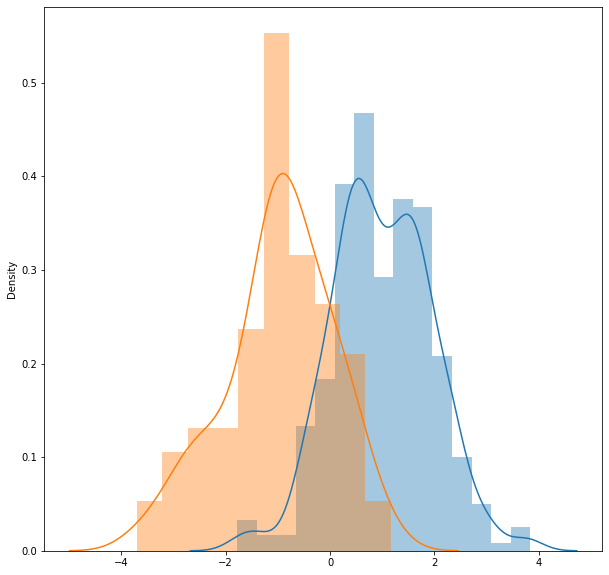

In [945]:
#Requires proper labelling
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class1_train,label='C1')
sns.distplot(class2_train)
plt.show()

# **EXTRA ANALYSIS OF DISCRETIZED DATASTET DISTRIBUTION USING PLOTS**

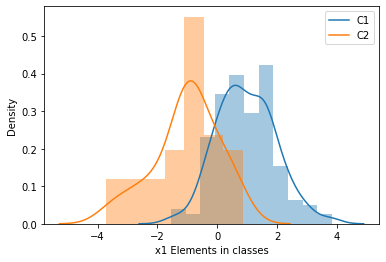

In [946]:
#plotting the x1 distribution in class c1 and class c2
sns.distplot(class1_train[:,0])
sns.distplot(class2_train[:,0])
plt.xlabel("x1 Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.show()

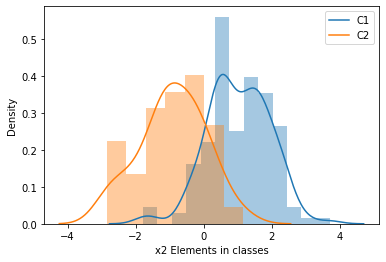

In [947]:
#plotting the x2 distribution in class c1 and class c2
sns.distplot(class1_train[:,1])
sns.distplot(class2_train[:,1])
plt.xlabel("x2 Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.show()

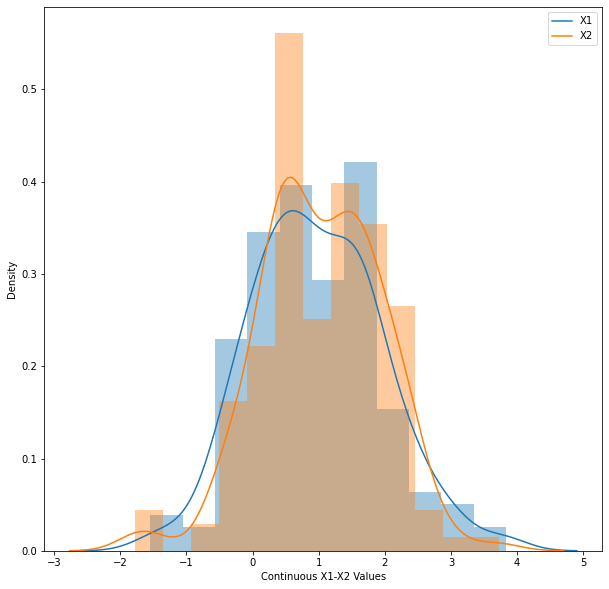

In [948]:
#plotting the x1-x2 distribution in class c1
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class1_train[:,0])
sns.distplot(class1_train[:,1])
plt.xlabel("Continuous X1-X2 Values")
plt.legend(labels = ['X1','X2'])
plt.show()

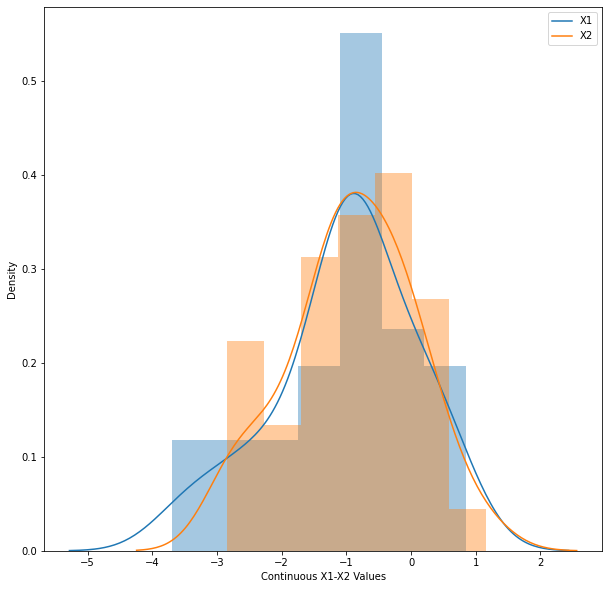

In [949]:
#plotting the x1-x2 distribution in class c2
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class2_train[:,0])
sns.distplot(class2_train[:,1])
plt.xlabel("Continuous X1-X2 Values")
plt.legend(labels = ['X1','X2'])
plt.show()

Plot the data distribution and the histogram of feature 1 and feature 2 in the x axis and the y -axis respectively. The distribution of feature 1 wil be along the top of the x-axis and feature 2 along the right of the y axis.

In [950]:
#this is only for data visualisation 
feature_11 = [] #to store feature x1 pf c1
feature_21 =[] #to store feature x2 of c1
feature_12 = []#to store feature x1 of c2
feature_22 =[] #to store feature x2 of c2
for i in class1_train:
  feature_11.append(i[0])
  feature_21.append(i[1])
for i in class2_train:
  feature_12.append(i[0])
  feature_22.append(i[1])
#making dataframes for jointplot
df_c1_1 = {"feature1":feature_11,"feature2":feature_21,"class":[1]*len(feature_11)}
data_1 = pd.DataFrame(df_c1_1)
df_c2_1 = {"feature1":feature_12,"feature2":feature_22,"class":[0]*len(feature_12)}
data_2 = pd.DataFrame(df_c2_1)

df = pd.concat([data_1,data_2],ignore_index=True)

<Figure size 720x720 with 0 Axes>

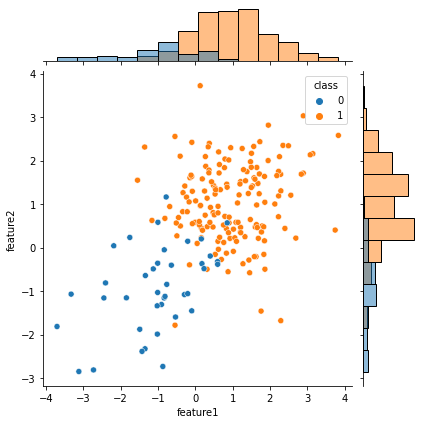

In [951]:
g1 = plt.figure()
g1.set_figwidth(10)
g1.set_figheight(10)
g1 = sns.JointGrid(df["feature1"],df["feature2"],hue = df['class'])
g1.plot(sns.scatterplot,sns.histplot)
plt.show()

In [952]:
# from collections import Counter
# x1_c1 = class1_train[:,0]
# unique_c1 = Counter(x).keys() 
# count_unique_c1 = list(Counter(x).values()) 
# x = class2_train[:,0]
# unique_c2 = Counter(x).keys() 
# count_unique_c2 = list(Counter(x).values()) 

#counting unique values
from collections import Counter
x1_c1 = class1_train1[:,0]
print("x1_c1",x1_c1)
unique1_c1 = Counter(x1_c1).keys() 
print("unique values for X1 of c1:",unique1_c1)
count_unique1_c1 = list(Counter(x1_c1).values()) 
print("count of unique values of X1 of c1:",count_unique1_c1)
print("<---------------------------------------------------------------------->")
x1_c2 = class2_train2[:,0]
print("x1_c2",x1_c2)
unique1_c2 = Counter(x1_c2).keys() 
print("unique values for X1 of c2:",unique1_c2)
count_unique1_c2 = list(Counter(x1_c2).values())
print("count of unique values of X1 of c2:",count_unique1_c2)
print("<---------------------------------------------------------------------->")
x2_c1 = class2_train2[:,1]
print("x2_c1",x2_c1)
unique2_c1 = Counter(x2_c1).keys() 
print("unique values for X2 of c1:",unique2_c1)
count_unique2_c1 = list(Counter(x2_c1).values()) 
print("count of unique values of X2 of c1:",count_unique2_c1)
print("<---------------------------------------------------------------------->")
x2_c2 = class2_train2[:,1]
print("x2_c2",x2_c2)
unique2_c2 = Counter(x2_c2).keys() 
print("unique values for X2 of c2:",unique2_c2)
count_unique2_c2 = list(Counter(x2_c2).values())
print("count of unique values of X2 of c2:",count_unique2_c2)

x1_c1 [5 4 8 7 6 5 6 6 6 5 6 4 7 6 7 4 6 7 5 8 6 6 4 5 7 4 7 6 8 5 5 4 5 5 6 5 6
 6 6 5 5 5 6 5 6 5 4 4 5 6 4 5 3 6 5 5 5 5 5 4 4 6 6 4 4 4 7 5 5 4 4 5 5 6
 5 6 6 6 4 6 7 6 6 4 6 6 6 4 6 5 8 7 4 5 6 5 3 5 5 5 5 4 5 4 4 6 5 6 7 7 5
 6 5 5 6 6 5 5 6 6 5 6 6 5 6 8 5 7 5 5 7 5 4 6 5 5 5 5 6 4 6 5 7 6 6 6 7 5
 6 7 5 5 6 3 5 8 6 5 6]
unique values for X1 of c1: dict_keys([5, 4, 8, 7, 6, 3])
count of unique values of X1 of c1: [57, 25, 6, 16, 52, 3]
<---------------------------------------------------------------------->
x1_c2 [4 3 4 3 3 5 5 3 3 2 5 4 2 4 3 3 4 4 2 5 3 4 4 1 3 3 5 2 1 4 3 4 2 1 4 3 5
 5 4]
unique values for X1 of c2: dict_keys([4, 3, 5, 2, 1])
count of unique values of X1 of c2: [12, 12, 7, 5, 3]
<---------------------------------------------------------------------->
x2_c1 [5 1 2 2 2 4 4 4 3 3 3 3 3 4 1 4 2 3 3 4 3 4 3 3 2 5 5 1 2 3 2 3 4 1 3 3 4
 4 1]
unique values for X2 of c1: dict_keys([5, 1, 2, 4, 3])
count of unique values of X2 of c1: [3, 5, 7, 10, 14]
<--------------

In [953]:
x1_comb = list(set(list(x1_c1)+list(x1_c2))) #combining x1 of c1 and c2
x1_comb.sort()
x2_comb = list(set(list(x2_c1)+list(x2_c2))) #combining x2 of c1 and c2
x2_comb.sort()

In [954]:
# #sns.color_palette("Paired", 9)
# y1 = np.array(count_unique_c1)/len(x_c1)
# sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
# y2 = np.array(count_unique_c2)/len(x_c2)
# sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
# plt.xlabel("Class")
# plt.ylabel("P(x|c)")
# plt.show()
# #print(y1)
# #print(y2)

# **Plot the count of each unique element for each class**

**EXTRA ANALYSIS OF DISCRETISED BINS USING VARIOUS TYPES OF PLOTS**

# HISTOGRAM PLOTS

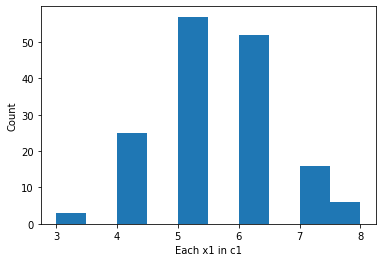

In [955]:
#plot of count of each value of x1 present in c1
plt.hist(x1_c1)
plt.xlabel("Each x1 in c1")
plt.ylabel("Count")
plt.show()

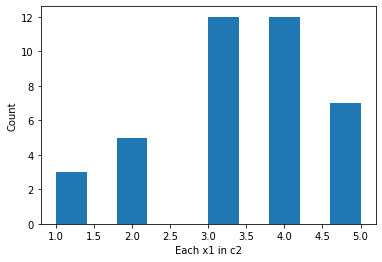

In [956]:
#plot of count of each value of x1 present in c2
plt.hist(x1_c2)
plt.xlabel("Each x1 in c2")
plt.ylabel("Count")
plt.show()

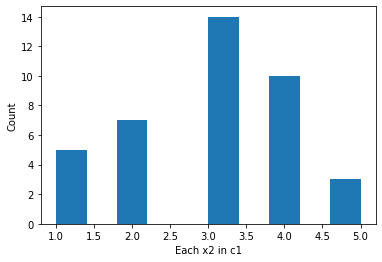

In [957]:
#plot of count of each value of x2 present in c1
plt.hist(x2_c1)
plt.xlabel("Each x2 in c1")
plt.ylabel("Count")
plt.show()

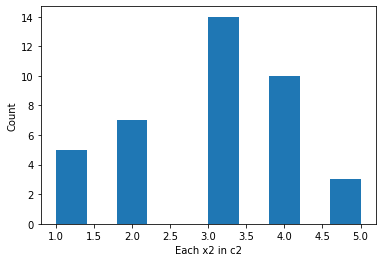

In [958]:
#plot of count of each value of x2 present in c2
plt.hist(x2_c2)
plt.xlabel("Each x2 in c2")
plt.ylabel("Count")
plt.show()

# DISTPLOTS

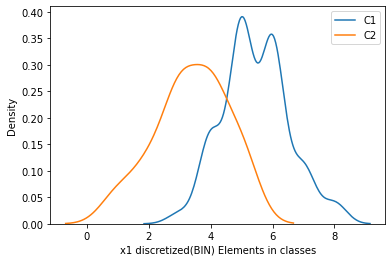

In [959]:
#COMBINED PLOT OF X1 IN C1 AND C2
sns.distplot(x1_c1,hist=False)
sns.distplot(x1_c2,hist=False)
plt.xlabel("x1 discretized(BIN) Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.show()

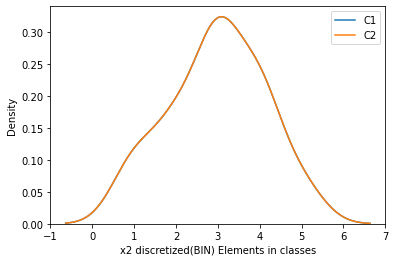

In [960]:
#COMBINED PLOT OF X2 IN C1 AND C2
sns.distplot(x2_c1,hist=False)
sns.distplot(x2_c2,hist=False)
plt.xlabel("x2 discretized(BIN) Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.show()

# LINEPLOTS

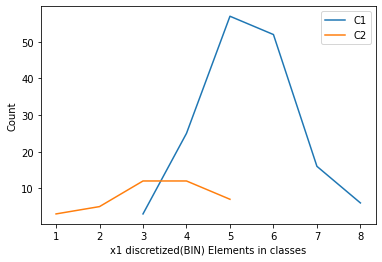

In [961]:
sns.lineplot(list(unique1_c1),count_unique1_c1)
sns.lineplot(list(unique1_c2),count_unique1_c2)
plt.xlabel("x1 discretized(BIN) Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.ylabel("Count")
plt.show()

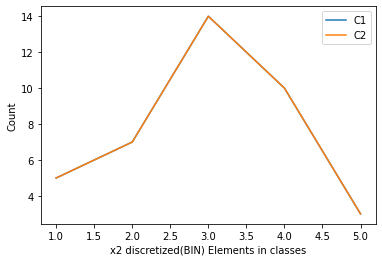

In [962]:
sns.lineplot(list(unique2_c1),count_unique2_c1)
sns.lineplot(list(unique2_c2),count_unique2_c2)
plt.xlabel("x2 discretized(BIN) Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.ylabel("Count")
plt.show()

# **LIKELIHOOD**

p(x1|c1) [0.35849057 0.1572327  0.03773585 0.10062893 0.32704403 0.01886792]
p(x1|c2) [0.30769231 0.30769231 0.17948718 0.12820513 0.07692308]


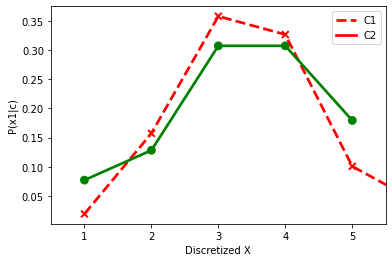

In [963]:
#likelihood p(x1|c1) and p(x1|c2)
y_x1_c1 = np.array(count_unique1_c1)/len(x1_c1)
print("p(x1|c1)",y_x1_c1)
sns.pointplot(list(unique1_c1),y_x1_c1, linestyles="--",markers =['x'],color='r' )
y_x1_c2 = np.array(count_unique1_c2)/len(x1_c2)
print("p(x1|c2)",y_x1_c2)
sns.pointplot(list(unique1_c2),y_x1_c2,linestyles='-',markers=['o'],color='g')
plt.xlabel("Discretized X")
plt.ylabel("P(x1|c)")
plt.legend(labels = ['C1','C2'])
plt.show()

p(x2|c1) [0.07692308 0.12820513 0.17948718 0.25641026 0.35897436]
p(x2|c2 [0.07692308 0.12820513 0.17948718 0.25641026 0.35897436]


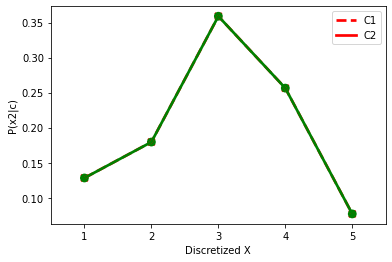

In [964]:
#likelihood p(x2|c1) and p(x2|c2)
y_x2_c1 = np.array(count_unique2_c1)/len(x2_c1)
print("p(x2|c1)",y_x2_c1)
sns.pointplot(list(unique2_c1),y_x2_c1, linestyles="--",markers =['x'],color='r' )
y_x2_c2 = np.array(count_unique2_c2)/len(x2_c2)
print("p(x2|c2",y_x2_c2)
sns.pointplot(list(unique2_c2),y_x2_c2,linestyles='-',markers=['o'],color='g')
plt.xlabel("Discretized X")
plt.ylabel("P(x2|c)")
plt.legend(labels = ['C1','C2'])
plt.show()

# Plot the Posterior Probability for each class

In [965]:
uc_x1_c1 = list(unique1_c1)
uc_x1_c2 = list(unique1_c2)
uc_x2_c1 = list(unique2_c1)
uc_x2_c2 = list(unique2_c2)
num_x1_c1 = y_x1_c1*prob_c1
num_x1_c2 = y_x1_c2*prob_c2
num_x2_c1 = y_x2_c1*prob_c1
num_x2_c2 = y_x2_c2*prob_c2
#for feature 1
for i in x1_comb:
  c11=0
  c12=0
  if uc_x1_c1.count(i)==1 and uc_x1_c2.count(i)==1:
    c11 = y_x1_c1[uc_x1_c1.index(i)]*prob_c1
    c12 = y_x1_c2[uc_x1_c2.index(i)]*prob_c2
    evidence = c11+c12
    num_x1_c1[uc_x1_c1.index(i)]/=evidence
    num_x1_c2[uc_x1_c2.index(i)]/=evidence
  else:
    if uc_x1_c1.count(i)==1:
      c11 = y_x1_c1[uc_x1_c1.index(i)]*prob_c1
      num_x1_c1[uc_x1_c1.index(i)]/=c11
    else:
      c12 = y_x1_c2[uc_x1_c2.index(i)]*prob_c2
      num_x1_c2[uc_x1_c2.index(i)]/=c12

#for feature 2
for i in x2_comb:
  c11=0
  c12=0
  if uc_x2_c1.count(i)==1 and uc_x2_c2.count(i)==1:
    c11 = y_x2_c1[uc_x2_c1.index(i)]*prob_c1
    c12 = y_x2_c2[uc_x2_c2.index(i)]*prob_c2
    evidence = c11+c12
    num_x2_c1[uc_x2_c1.index(i)]/=evidence
    num_x2_c2[uc_x2_c2.index(i)]/=evidence
  else:
    if uc_x2_c1.count(i)==1:
      c11 = y_x2_c1[uc_x2_c1.index(i)]*prob_c1
      num_x2_c1[uc_x2_c1.index(i)]/=c11
    else:
      c12 = y_x1_c2[uc_x1_c2.index(i)]*prob_c2
      num_x2_c2[uc_x1_c2.index(i)]/=c12


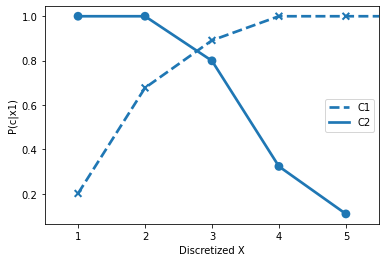

[0.89123424 0.67704807 1.         1.         1.         0.20100503]
[0.32295193 0.79899497 0.10876576 1.         1.        ]


In [966]:
sns.pointplot(list(unique1_c1),num_x1_c1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique1_c2),num_x1_c2,linestyles='-',markers=['o'])
plt.xlabel("Discretized X")
plt.ylabel("P(c|x1)")
plt.legend(labels = ['C1','C2'])
plt.show()
print(num_x1_c1)
print(num_x1_c2)

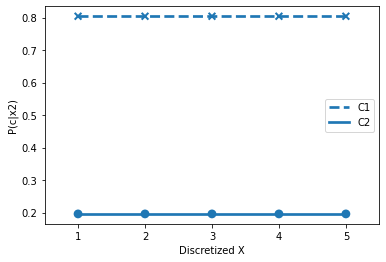

[0.8040201 0.8040201 0.8040201 0.8040201 0.8040201]
[0.1959799 0.1959799 0.1959799 0.1959799 0.1959799]


In [991]:
sns.pointplot(list(unique2_c1),num_x2_c1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique2_c2),num_x2_c2,linestyles='-',markers=['o'])
plt.xlabel("Discretized X")
plt.ylabel("P(c|x2)")
plt.legend(labels = ['C1','C2'])
plt.show()
print(num_x2_c1)
print(num_x2_c2)

# **IRIS DATASTET VISUALISATION**

In [968]:
from sklearn.preprocessing import OrdinalEncoder

#load the dataset
iris= pd.read_csv('/content/Iris.csv')
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
#preprocessing
pre_process = OrdinalEncoder()
iris['Species'] = pre_process.fit_transform(iris[['Species']])


class_0_0 = iris.iloc[:50].to_numpy() #extracting only the features of class iris-setosa
class_0_1 = iris.iloc[51:100].to_numpy() #extracting only the features of class iris-versicolor
class_0_2 = iris.iloc[101:].to_numpy() #extracting only the features of class iris-virginica

#creating bins of every feature
for i in features:
  iris[i]=pd.cut(iris[i],bins = 8,right = False,labels = [1,2,3,4,5,6,7,8])

class_0 = iris.iloc[:50].to_numpy() #extracting only the features of class iris-setosa after making different set of bins
class_1 = iris.iloc[51:100].to_numpy()#extracting only the features of class iris-versicolor after making different set of bins
class_2 = iris.iloc[101:].to_numpy()#extracting only the features of class iris-virginica after making different set of bins

# **Distribution Plots for x1(sepal length) and x2(sepal width)**




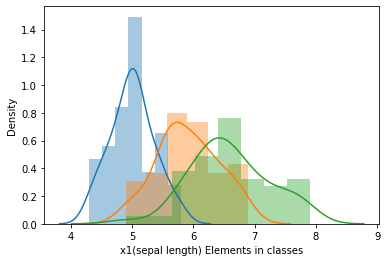

In [969]:
#sepallengthcm distribution plot for 3 classes
sns.distplot(class_0_0[:,1])
sns.distplot(class_0_1[:,1])
sns.distplot(class_0_2[:,1])
plt.xlabel("x1(sepal length) Elements in classes")
plt.show()

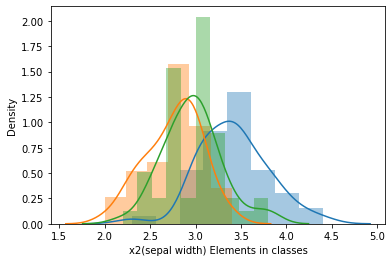

In [970]:
#sepal widthcm distribution plot for 3 classes
sns.distplot(class_0_0[:,2])
sns.distplot(class_0_1[:,2])
sns.distplot(class_0_2[:,2])
plt.xlabel("x2(sepal width) Elements in classes")
plt.show()

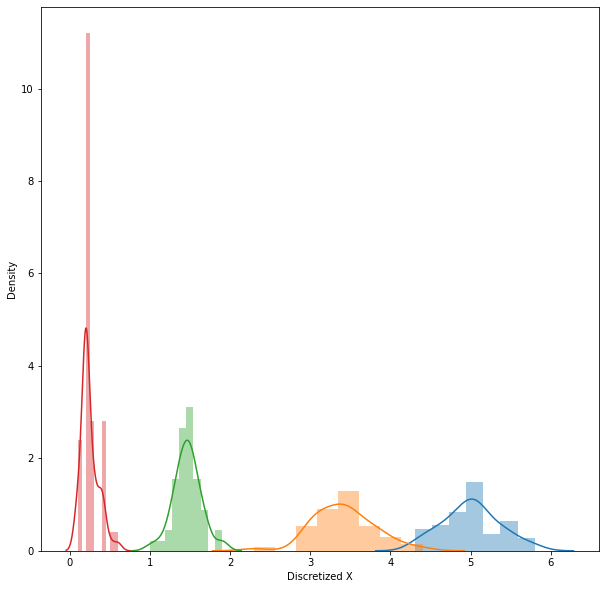

In [971]:
#distribution plot of all four feature for class iris-setosa
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class_0_0[:,1])
sns.distplot(class_0_0[:,2])
sns.distplot(class_0_0[:,3])
sns.distplot(class_0_0[:,4])
plt.xlabel("Discretized X")
plt.show()

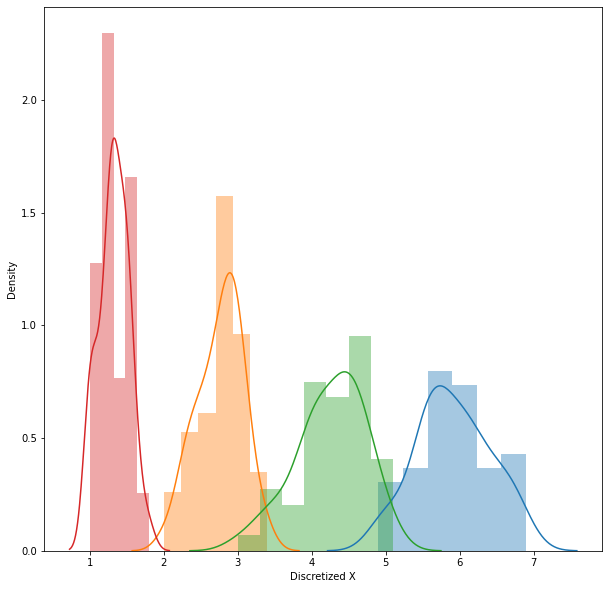

In [972]:
#distribution plot of all four feature for class iris-versicolor
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class_0_1[:,1])
sns.distplot(class_0_1[:,2])
sns.distplot(class_0_1[:,3])
sns.distplot(class_0_1[:,4])
plt.xlabel("Discretized X")
plt.show()

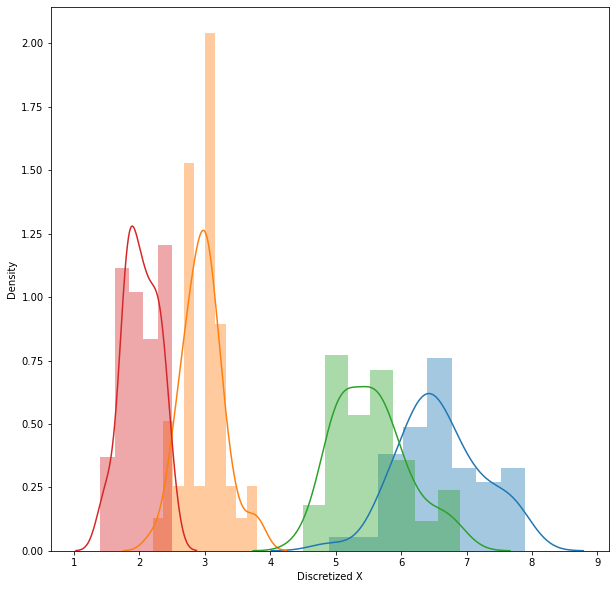

In [973]:
##distribution plot of all four  feature for class iris-virginica
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class_0_2[:,1])
sns.distplot(class_0_2[:,2])
sns.distplot(class_0_2[:,3])
sns.distplot(class_0_2[:,4])
plt.xlabel("Discretized X")
plt.show()

# **Unique values**

In [974]:
#finding unique values for x1 feature:sepal length for class iris-setosa
x1_class_0 = class_0[:,1]
unique1_class_0 = list(Counter(x1_class_0).keys()) 
print("unique values for X1 of class0:",unique1_class_0)
count_unique1_class_0 = list(Counter(x1_class_0).values()) 
print("count of unique vlaues of X1 of class0:",count_unique1_class_0)
print("<---------------------------------------------------------------------->")

#finding unique values for x1 feature:sepal length for class iris-versicolor
x1_class_1 = class_1[:,1]
unique1_class_1 = list(Counter(x1_class_1).keys())
print("unique values for X1 of class1:",unique1_class_1) 
count_unique1_class_1 = list(Counter(x1_class_1).values())
print("count of unique vlaues of X1 of class1:",count_unique1_class_1)
print("<---------------------------------------------------------------------->")

#finding unique values for x1 feature:sepal length for class iris-virginica
x1_class_2 = class_2[:,1]
unique1_class_2 = list(Counter(x1_class_2).keys()) 
print("unique values for X1 of class2:",unique1_class_2)
count_unique1_class_2 = list(Counter(x1_class_2).values())
print("count of unique vlaues of X1 of class2:",count_unique1_class_2)
print("<---------------------------------------------------------------------->")

#combining them all
x1_comb = list(set(list(x1_class_0)+list(x1_class_1)+list(x1_class_2))) 


#finding unique values for x2 feature:sepal width for class iris-setosa
x2_class_0 = class_0[:,2]
unique2_class_0 = list(Counter(x2_class_0).keys()) 
print("unique values for X2 of class0:",unique2_class_0)
count_unique2_class_0 = list(Counter(x2_class_0).values())
print("count of unique vlaues of X2 of class0:",count_unique2_class_0)
print("<---------------------------------------------------------------------->") 

#finding unique values for x2 feature:sepal width for class iris-versicolor
x2_class_1 = class_1[:,2]
unique2_class_1 = list(Counter(x2_class_1).keys()) 
print("unique values for X1 of class1:",unique1_class_1)
count_unique2_class_1 = list(Counter(x2_class_1).values())
print("count of unique vlaues of X1 of class1:",count_unique1_class_1)
print("<---------------------------------------------------------------------->")

#finding unique values for x2 feature:sepal width for class iris-virginica
x2_class_2 = c2[:,2]
unique2_class_2 = list(Counter(x2_class_2).keys()) 
print("unique values for X2 of class2:",unique2_class_2)
count_unique2_class_2 = list(Counter(x2_class_2).values())
print("count of unique vlaues of X1 of class2:",count_unique2_class_2)
print("<---------------------------------------------------------------------->")

#combining them all
x2_comb = list(set(list(x2_class_0)+list(x2_class_1)+list(x2_class_2)))

x1_comb.sort()
x2_comb.sort()
# print(x1_comb,x2_comb)
# print(list(x1_class_0),list(x1_class_1),list(x1_class_2))

unique values for X1 of class0: [2.0, 1.0, 3.0, 4.0]
count of unique vlaues of X1 of class0: [25, 11, 11, 3]
<---------------------------------------------------------------------->
unique values for X1 of class1: [5.0, 6.0, 3.0, 4.0, 2.0]
count of unique vlaues of X1 of class1: [12, 7, 12, 14, 4]
<---------------------------------------------------------------------->
unique values for X1 of class2: [4.0, 7.0, 5.0, 8.0, 2.0, 6.0, 3.0]
count of unique vlaues of X1 of class2: [7, 6, 18, 6, 1, 10, 1]
<---------------------------------------------------------------------->
unique values for X2 of class0: [6.0, 4.0, 5.0, 7.0, 3.0, 8.0, 2.0]
count of unique vlaues of X2 of class0: [15, 11, 16, 4, 1, 2, 1]
<---------------------------------------------------------------------->
unique values for X1 of class1: [5.0, 6.0, 3.0, 4.0, 2.0]
count of unique vlaues of X1 of class1: [12, 7, 12, 14, 4]
<---------------------------------------------------------------------->
unique values for X2 of cla

# **Histogram Plot for X1 ,X2 FEATURES of CLASS 0,1,2**

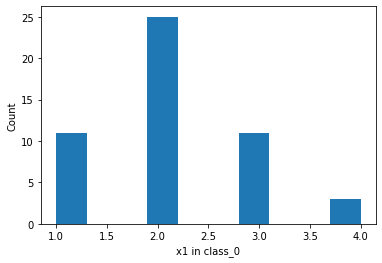

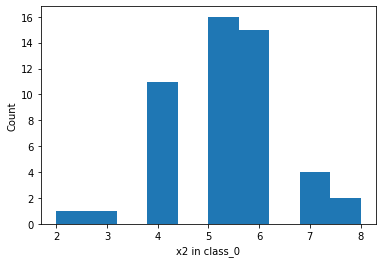

In [975]:
plt.hist(x1_class_0)
plt.xlabel("x1 in class_0")
plt.ylabel("Count")
plt.show()

plt.hist(x2_class_0)
plt.xlabel("x2 in class_0")
plt.ylabel("Count")
plt.show()

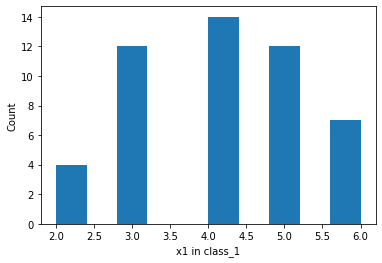

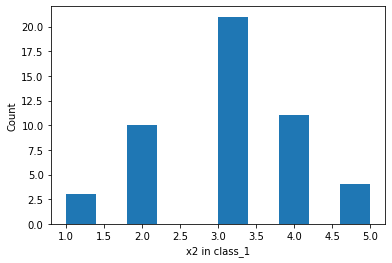

In [976]:
plt.hist(x1_class_1)
plt.xlabel("x1 in class_1")
plt.ylabel("Count")
plt.show()

plt.hist(x2_class_1)
plt.xlabel("x2 in class_1")
plt.ylabel("Count")
plt.show()

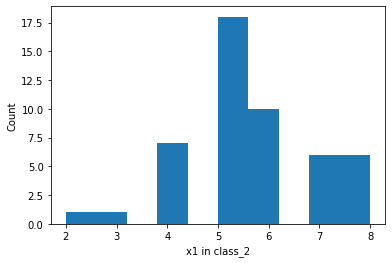

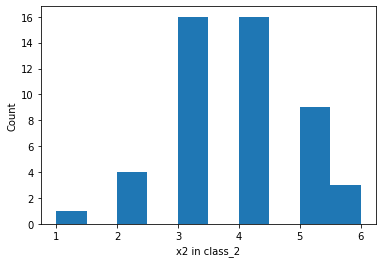

In [977]:
plt.hist(x1_class_2)
plt.xlabel("x1 in class_2")
plt.ylabel("Count")
plt.show()

plt.hist(x2_class_2)
plt.xlabel("x2 in class_2")
plt.ylabel("Count")
plt.show()

# **Distplots for Bin values of Features for three different classes**

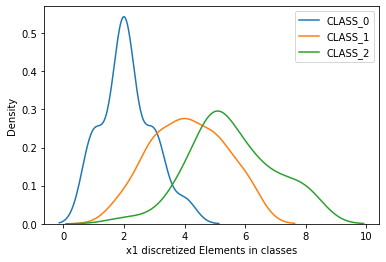

In [978]:
#distplot for feature x1 (after converting it into bins)
sns.distplot(x1_class_0,hist=False)
sns.distplot(x1_class_1,hist=False)
sns.distplot(x1_class_2,hist=False)
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.xlabel("x1 discretized Elements in classes")
plt.show()

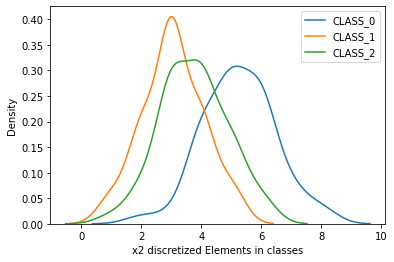

In [979]:
#distplot for feature x2 (after converting it into bins)
sns.distplot(x2_class_0,hist=False)
sns.distplot(x2_class_1,hist=False)
sns.distplot(x2_class_2,hist=False)
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.xlabel("x2 discretized Elements in classes")
plt.show()

# **LINE PLOTS for Unique Values**

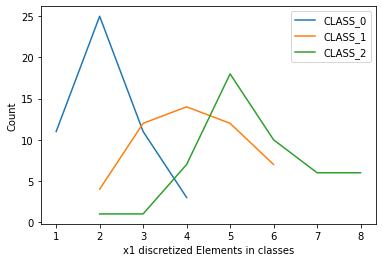

In [980]:
#line plots for unique values for x1 (discretized) in different classes 0,1,2
sns.lineplot(list(unique1_class_0),count_unique1_class_0)
sns.lineplot(list(unique1_class_1),count_unique1_class_1)
sns.lineplot(list(unique1_class_2),count_unique1_class_2)
plt.xlabel("x1 discretized Elements in classes")
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.ylabel("Count")
plt.show()

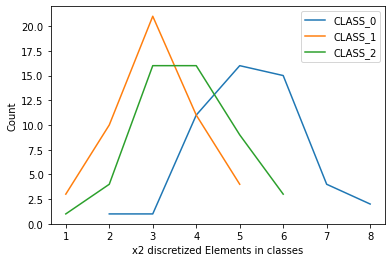

In [981]:
#line plots for unique values for x2 (discretized) in different classes 0,1,2
sns.lineplot(list(unique2_class_0),count_unique2_class_0)
sns.lineplot(list(unique2_class_1),count_unique2_class_1)
sns.lineplot(list(unique2_class_2),count_unique2_class_2)
plt.xlabel("x2 discretized Elements in classes")
plt.ylabel("Count")
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.show()

# **Prior Probabilities**

In [982]:
k = iris.shape[0]
p_class_0 = len(class_0)/k
p_class_1 = len(class_1)/k
p_class_2 = len(class_2)/k

# **Likelihood**

In [983]:
#likelihood 1 p(x1|class_0)
p_x1_class_0 = np.array(count_unique1_class_0)/len(x1_class_0)
print("likelihood 1 p(x1|class_0):",p_x1_class_0)
print("")
#liklihood 2 p(x2|class_0)
p_x2_class_0 = np.array(count_unique2_class_0)/len(x2_class_0)
print("likelihood 2 p(x1|class_0):",p_x2_class_0)
print("")
#likelihood 3 p(x1|class_1)
p_x1_class_1 = np.array(count_unique1_class_1)/len(x1_class_1)
print("likelihood 3 p(x1|class_1):",p_x1_class_1)
print("")
#liklihood 4 p(x2|class_1)
p_x2_class_1 = np.array(count_unique2_class_1)/len(x2_class_1)
print("likelihood 4 p(x2|class_1):",p_x2_class_1)
print("")
#likelihood 5 p(x1|class_2)
p_x1_class_2 = np.array(count_unique1_class_2)/len(x1_class_2)
print("likelihood 5 p(x1|class_2):",p_x1_class_2)
print("")
#liklihood 6 p(x2|class_2)
p_x2_class_2 = np.array(count_unique2_class_2)/len(x2_class_2)
print("likelihood 6 p(x2|class_2):",p_x2_class_2)
print("")

likelihood 1 p(x1|class_0): [0.5  0.22 0.22 0.06]

likelihood 2 p(x1|class_0): [0.3  0.22 0.32 0.08 0.02 0.04 0.02]

likelihood 3 p(x1|class_1): [0.24489796 0.14285714 0.24489796 0.28571429 0.08163265]

likelihood 4 p(x2|class_1): [0.08163265 0.2244898  0.20408163 0.42857143 0.06122449]

likelihood 5 p(x1|class_2): [0.14285714 0.12244898 0.36734694 0.12244898 0.02040816 0.20408163
 0.02040816]

likelihood 6 p(x2|class_2): [0.32653061 0.32653061 0.08163265 0.06122449 0.18367347 0.02040816]



Plot the p(x1|class_0),p(x1|class_1),p(x1|class_2)

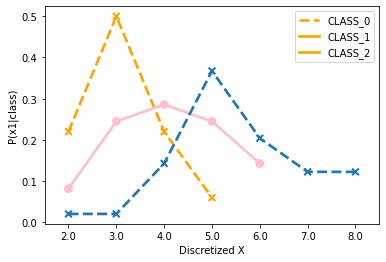

In [984]:
sns.pointplot(list(unique1_class_0),p_x1_class_0, linestyles="--",markers =['x'],color='Orange')
sns.pointplot(list(unique1_class_1),p_x1_class_1,linestyles='-',markers=['o'],color ='Pink')
sns.pointplot(list(unique1_class_2),p_x1_class_2, linestyles="--",markers =['x'] )
plt.xlabel("Discretized X")
plt.ylabel("P(x1|class)")
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.show()

Plot the p(x2|class_0),p(x2|class_1),p(x2|class_2)

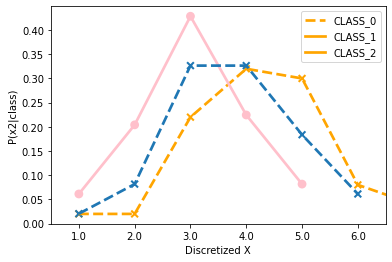

In [985]:
sns.pointplot(list(unique2_class_0),p_x2_class_0, linestyles="--",markers =['x'],color='Orange')
sns.pointplot(list(unique2_class_1),p_x2_class_1,linestyles='-',markers=['o'],color='Pink')
sns.pointplot(list(unique2_class_2),p_x2_class_2, linestyles="--",markers =['x'] )
plt.xlabel("Discretized X")
plt.ylabel("P(x2|class)")
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.show()

In [986]:
#here we are calculating prior*likelihood
class_0_p_x1 = p_x1_class_0 * p_class_0
class_0_p_x2 = p_x2_class_0 * p_class_0

class_1_p_x1 = p_x1_class_1 * p_class_1
class_1_p_x2 = p_x2_class_1 * p_class_1

class_2_p_x1 = p_x1_class_2 * p_class_2
class_2_p_x2 = p_x2_class_2 * p_class_2


# **Posterior Probabilities**

In [987]:
for i in x1_comb:
  p0=0
  p1=0
  p2=0
  if unique1_class_0.count(i)==1 and unique1_class_1.count(i)==1 and unique1_class_2.count(i)==1:
    p0 = p_x1_class_0[unique1_class_0.index(i)]* p_class_0
    p1 = p_x1_class_1[unique1_class_1.index(i)]* p_class_1
    p2 = p_x1_class_2[unique1_class_2.index(i)]* p_class_2
    evidence = p0+p1+p2
    class_0_p_x1[unique1_class_0.index(i)]/=evidence
    class_1_p_x1[unique1_class_1.index(i)]/=evidence
    class_2_p_x1[unique1_class_2.index(i)]/=evidence
  elif (unique1_class_0.count(i)==1 and unique1_class_1.count(i)==1) or (unique1_class_1.count(i)==1 and unique1_class_2.count(i)==1) or (unique1_class_0.count(i)==1 and unique1_class_2.count(i)==1):
    if (unique1_class_0.count(i)==1 and unique1_class_1.count(i)==1):
      p0 = p_x1_class_0[unique1_class_0.index(i)]* p_class_0
      p1 = p_x1_class_1[unique1_class_1.index(i)]* p_class_1
      evidence = p0+p1
      class_0_p_x1[unique1_class_0.index(i)]/=evidence
      class_1_p_x1[unique1_class_1.index(i)]/=evidence
    elif (unique1_class_1.count(i)==1 and unique1_class_2.count(i)==1):
      p1 = p_x1_class_1[unique1_class_1.index(i)]* p_class_1
      p2 = p_x1_class_2[unique1_class_2.index(i)]* p_class_2
      evidence = p1+p2
      class_1_p_x1[unique1_class_1.index(i)]/=evidence
      class_2_p_x1[unique1_class_2.index(i)]/=evidence
    else:
      p0 = p_x1_class_0[unique1_class_0.index(i)]* p_class_0
      p2 = p_x1_class_2[unique1_class_2.index(i)]* p_class_2
      evidence = p0+p2
      class_0_p_x1[unique1_class_0.index(i)]/=evidence
      class_2_p_x1[unique1_class_2.index(i)]/=evidence
  else:
    if unique1_class_0.count(i)==1:
      p0 = p_x1_class_0[unique1_class_0.index(i)]* p_class_0
      class_0_p_x1[unique1_class_0.index(i)]/=p0
    elif unique1_class_1.count(i)==1:
      p1 = p_x1_class_1[unique1_class_1.index(i)]* p_class_1
      class_1_p_x1[unique1_class_1.index(i)]/=p1
    else:
      p2 = p_x1_class_2[unique1_class_2.index(i)]* p_class_2
      class_2_p_x1[unique1_class_2.index(i)]/=p2

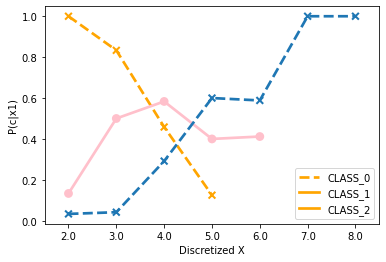

In [988]:
sns.pointplot(list(unique1_class_0),class_0_p_x1, linestyles="--",markers =['x'],color='Orange')
sns.pointplot(list(unique1_class_1),class_1_p_x1,linestyles='-',markers=['o'],color='Pink')
sns.pointplot(list(unique1_class_2),class_2_p_x1, linestyles="--",markers =['x'] )
plt.xlabel("Discretized X")
plt.ylabel("P(c|x1)")
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.show()

In [989]:
for i in x2_comb:
  p0=0
  p1=0
  p2=0
  if unique2_class_0.count(i)==1 and unique2_class_1.count(i)==1 and unique2_class_2.count(i)==1:
    p0 = p_x2_class_0[unique2_class_0.index(i)]* p_class_0
    p1 = p_x2_class_1[unique2_class_1.index(i)]* p_class_1
    p2 = p_x2_class_2[unique2_class_2.index(i)]* p_class_2
    evidence = p0+p1+p2
    class_0_p_x2[unique2_class_0.index(i)]/=evidence
    class_1_p_x2[unique2_class_1.index(i)]/=evidence
    class_2_p_x2[unique2_class_2.index(i)]/=evidence
  elif (unique2_class_0.count(i)==1 and unique2_class_1.count(i)==1) or (unique2_class_1.count(i)==1 and unique2_class_2.count(i)==1) or (unique2_class_0.count(i)==1 and unique2_class_2.count(i)==1):
    if (unique2_class_0.count(i)==1 and unique2_class_1.count(i)==1):
      p0 = p_x2_class_0[unique2_class_0.index(i)]* p_class_0
      p1 = p_x2_class_1[unique2_class_1.index(i)]* p_class_1
      evidence = p0+p1
      class_0_p_x2[unique2_class_0.index(i)]/=evidence
      class_1_p_x2[unique2_class_1.index(i)]/=evidence
    elif (unique2_class_1.count(i)==1 and unique2_class_2.count(i)==1):
      p1 = p_x2_class_1[unique2_class_1.index(i)]* p_class_1
      p2 = p_x2_class_2[unique2_class_2.index(i)]* p_class_2
      evidence = p1+p2
      class_1_p_x2[unique2_class_1.index(i)]/=evidence
      class_2_p_x2[unique2_class_2.index(i)]/=evidence
    else:
      p0 = p_x2_class_0[unique2_class_0.index(i)]* p_class_0
      p2 = p_x2_class_2[unique2_class_2.index(i)]* p_class_2
      evidence = p0+p2
      class_0_p_x2[unique2_class_0.index(i)]/=evidence
      class_2_p_x2[unique2_class_2.index(i)]/=evidence
  else:
    if unique2_class_0.count(i)==1:
      p0 = p_x2_class_0[unique2_class_0.index(i)]* p_class_0
      class_0_p_x2[unique2_class_0.index(i)]/=p0
    elif unique2_class_1.count(i)==1:
      p1 = p_x2_class_1[unique2_class_1.index(i)]* p_class_1
      class_1_p_x2[unique2_class_1.index(i)]/=p1
    else:
      p2 = p_x2_class_2[unique2_class_2.index(i)]* p_class_2
      class_2_p_x2[unique2_class_2.index(i)]/=p2

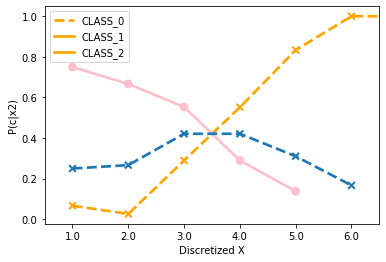

In [990]:
sns.pointplot(list(unique2_class_0),class_0_p_x2, linestyles="--",markers =['x'],color='Orange')
sns.pointplot(list(unique2_class_1),class_1_p_x2,linestyles='-',markers=['o'],color='Pink')
sns.pointplot(list(unique2_class_2),class_2_p_x2, linestyles="--",markers =['x'] )
plt.xlabel("Discretized X")
plt.ylabel("P(c|x2)")
plt.legend(labels = ['CLASS_0','CLASS_1','CLASS_2'])
plt.show()

# In the report please explain the plots that you are getting clearly explaining the reason .